In [4]:
import copy
import time
import numpy as np
from neural_network_for_simple_eq import NNTrain, get_p
import nn_functions_for_simple_eq as nn
from nn_functions_for_simple_eq import relative_err_without_points as rel_err
from plots import plot_fun, plot_iteration, animate_p
from itertools import product

In [2]:
a = NNTrain(nx=60, bx=300, hidden_nodes=20, alpha=1e-3, bc=1, batch_size=32)

In [3]:
p=[]
p.append(copy.deepcopy(get_p(a)))
a.train(100)

In [9]:
bc_multiplier = 5
thresh = 5e-7

for i in range(100000):
    p.append(copy.deepcopy(get_p(a)))
    if a.alpha < 1e-9  or a.bc > 100000:
        break
    if np.abs(np.mean([s-t for s, t in zip(a.cost_rate[-101:], a.cost_rate[-100:])])) < thresh:
        a.bc *= bc_multiplier
        a.alpha /= bc_multiplier
    a.train(100)

In [14]:
print('alpha:', a.alpha)
print('BC:', a.bc)
print('relative error:', rel_err(a.p00, a.p01, a.p1, a.p2, nx=1000))
print('number of iterations', len(a.cost_rate))

alpha: 2.5600000000000007e-09
BC: 390625
relative error: 0.013084010352487976
number of iterations 211601


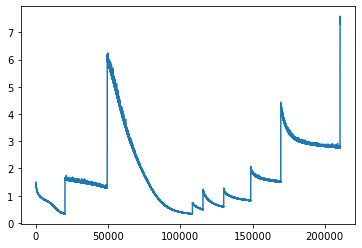

In [15]:
plot_iteration(a.cost_rate, min_it=1000)

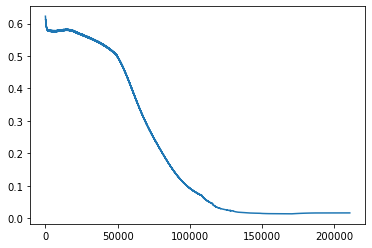

In [16]:
plot_iteration(a.rel_err, min_it=1000)

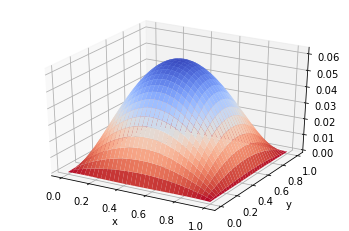

In [17]:
plot_fun(nn.N, p00=a.p00, p01=a.p01, p1=a.p1, p2=a.p2)

In [ ]:
plot_fun(nn.psi_a)

In [18]:
rel_err_for_p = []

for i in range(len(p)):
    rel_err_for_p.append(rel_err(p[i][0][0], p[i][0][1], p[i][1], p[i][2], nx=100))

In [21]:
len(p)

2118

In [19]:
rel_err_for_p = np.array(rel_err_for_p)

In [20]:
np.where(rel_err_for_p==np.amin(rel_err_for_p))[0][0], np.amin(rel_err_for_p)

(1705, 0.010352404288048594)

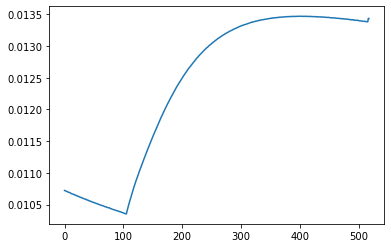

In [22]:
plot_iteration(rel_err_for_p, min_it=1600)

In [23]:
i=1705
rel_err(p[i][0][0], p[i][0][1], p[i][1], p[i][2], nx=1000)

0.009986808345375004

In [20]:
i=1705
rel_err(p[i][0][0], p[i][0][1], p[i][1], p[i][2], nx=1000)

0.009986808345375006

In [27]:
for weight in p[i][2]:
    print(f'{weight:.20f}')

-0.22560118771721315856
-1.27367010756589271736
0.52740576847429787577
-0.47680974944132076265
1.28014472045610649964
-1.76664794169141248226
1.54268184483855397282
-1.18140559844004733314
1.22753444333535144395
-1.65231867317761382807
0.57843051563220959643
2.15801082912088260102
-0.66451643496958101576
1.07236993594502805216
0.51243302890622166590
0.31295884652238220580
1.58995340340872304274
-1.23663326243657301085
-1.18020881939614064038
2.02143419720648465088


In [23]:
p[i][0][0]

array([-0.79163639,  2.10403757,  0.05550036,  0.14425694,  2.26624547,
        1.89629037,  0.16659768, -0.20000313,  2.09705928, -1.95743237,
       -1.55531233, -0.18252843, -0.02935967,  1.06881771,  0.38160169,
        1.38733299,  0.05243414,  0.39271083,  0.03811009, -2.07402147])

In [24]:
p[i][0][1]

array([ 0.40541065, -1.81787859,  2.79498064, -0.99473136, -1.70829622,
        1.71078513,  1.13783478, -0.31878802,  1.88476368, -0.07387194,
        0.05921863, -1.8913914 , -0.11067039,  0.00771923,  0.65832224,
        0.92006252, -1.23272251,  1.47489154, -0.79921539,  0.10457303])

In [10]:
print('relative error:', rel_err(a.p00, a.p01, a.p1, a.p2, nx=1000))

relative error: 0.01308401035248798


### Load parameters

In [9]:
name_str = '20200926-1840_simp_eq_3_final'

par = np.load('output/' + name_str + '_nn_params.npz', allow_pickle=True)['arr_0']
a.p00 = par[0][0]
a.p01 = par[0][1]
a.p1 = par[1]
a.p2 = par[2]
a.cost_rate = list(np.load('output/' + name_str + '_cost_rate.npz')['arr_0'])
a.rel_err = list(np.load('output/' + name_str + '_rel_err.npz')['arr_0'])
a.m_t = np.load('output/' + name_str + '_momentum.npz')['arr_0']
p = np.load('output/' + name_str + '_p_list.npz', allow_pickle=True)['arr_0']

In [25]:
output_name = 'simp_eq_3_final'
timestr = time.strftime("%Y%m%d-%H%M")

a.save_result(output_name)

np.savez('output/'+ timestr + '_' + output_name +'_p_list.npz', p)